# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [12]:
df = pd.read_csv('../data/states_edu.csv')
df.shape

(1715, 25)

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [18]:
df.columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna()
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
df.shape

(650, 25)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_READING_4_SCORE*

How many years of data are logged in our dataset?
14

In [19]:
print(df["YEAR"].unique())
print(df["YEAR"].nunique())

[1992 1994 1998 2002 2003 2005 2007 2009 2011 2013 2015 2017 2000 2019]
14


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

MICHIGAN

In [21]:
STATES = df.groupby("STATE")
STATES
STATES["AVG_READING_4_SCORE"].mean()

STATE
ALABAMA                 212.615385
ALASKA                  209.888889
ARIZONA                 210.230769
ARKANSAS                214.692308
CALIFORNIA              208.230769
COLORADO                222.666667
CONNECTICUT             227.000000
DELAWARE                220.384615
DISTRICT_OF_COLUMBIA    197.000000
DODEA                   228.636364
FLORIDA                 219.384615
GEORGIA                 216.230769
HAWAII                  210.153846
IDAHO                   221.000000
ILLINOIS                218.666667
INDIANA                 222.250000
IOWA                    222.538462
KANSAS                  222.000000
KENTUCKY                220.846154
LOUISIANA               207.230769
MAINE                   224.384615
MARYLAND                220.846154
MASSACHUSETTS           231.230769
MICHIGAN                217.833333
MINNESOTA               222.923077
MISSISSIPPI             207.769231
MISSOURI                220.538462
MONTANA                 224.000000
NATIONAL      

Find the average for your outcome score across all states in 2019

219.79245283018867

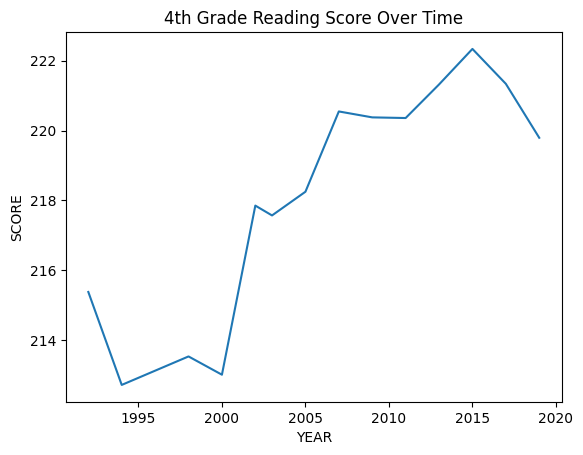

In [36]:

df.groupby('YEAR')["AVG_READING_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Reading Score Over Time')
df[df["YEAR"] == 2019]["AVG_READING_4_SCORE"].mean()

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [34]:
STATES["AVG_READING_4_SCORE"].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [53]:
df['AVG_4_SCORES'] = (df['AVG_READING_4_SCORE'] + df['AVG_MATH_4_SCORE']) / 2
df['EXPENDITURE_PER_REVENUE'] = df['TOTAL_EXPENDITURE'] / df['TOTAL_REVENUE']

Feature engineering justification: **The purpose of the engineering is
1.to investigate how well the student do on the reading based on the overall ability. As a result, We combined the 2 scores and got the average to get the overall ability.
2.to investigate the ammount of the capital the states put in the education effects on the reading score. Because of the revenue of each states is different, so as the expenditure.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Reading Score of 4th Grade')

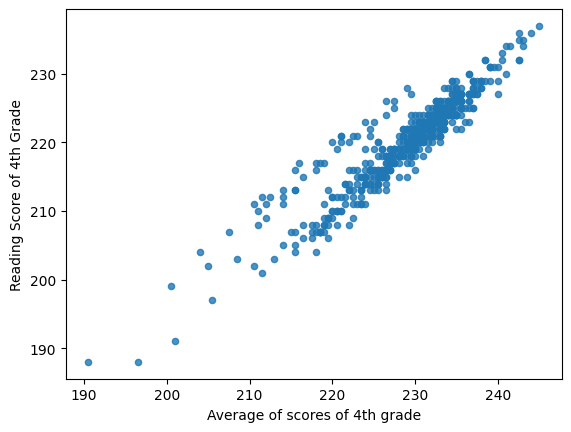

In [54]:
df.plot.scatter(x='AVG_4_SCORES', y='AVG_READING_4_SCORE', alpha=0.8)
plt.xlabel('Average of scores of 4th grade')
plt.ylabel('Reading Score of 4th Grade')

the reading score of 4th grade and the average score of math and reading (,which can potentially mean overall ability,) seems to be strongly correlated.


**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

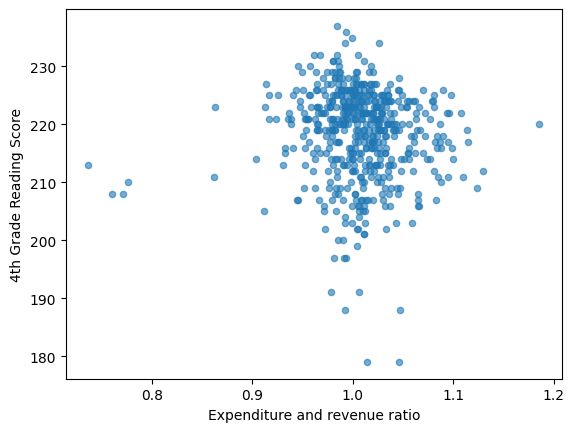

In [55]:
df.plot.scatter(x='EXPENDITURE_PER_REVENUE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Expenditure and revenue ratio')
plt.ylabel('4th Grade Reading Score')

**The first thought was that the ratio of Expenditure and revenue, and reading score of 4th grade had the correlation, but it doesn't seem to have correlation somehow.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [57]:
from sklearn.model_selection import train_test_split

In [60]:
# X =
X = df[['EXPENDITURE_PER_REVENUE','AVG_4_SCORES']].dropna()

# y = 
y = df.loc[X.index]['AVG_READING_4_SCORE']

y.fillna(y.mean(), inplace=True)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [63]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [64]:
# create your model here
# model = 
model = LinearRegression()

In [65]:
model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [69]:
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))


13.155054530146401
[7.37061885 0.87196192]
0.8632355242849907


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

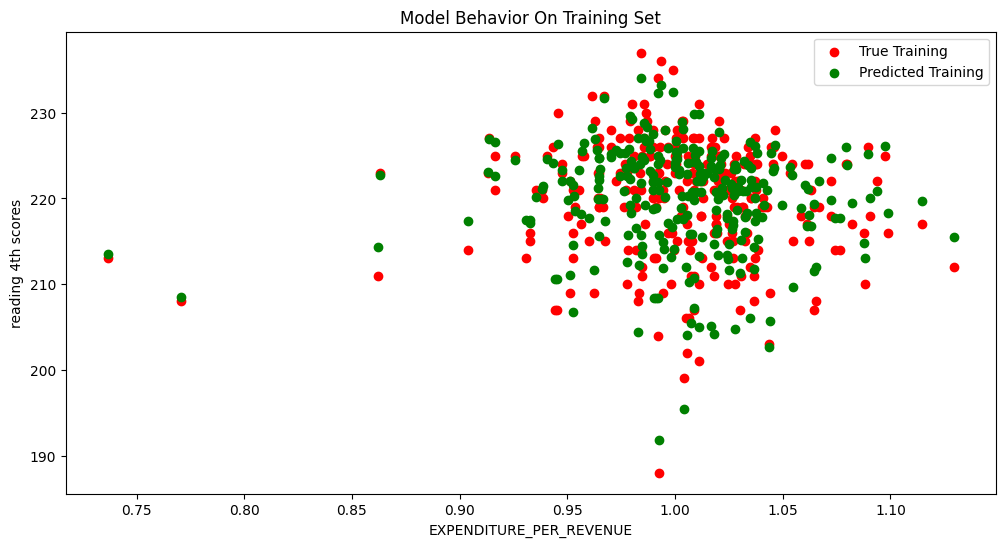

In [70]:
col_name = 'EXPENDITURE_PER_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('reading 4th scores')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

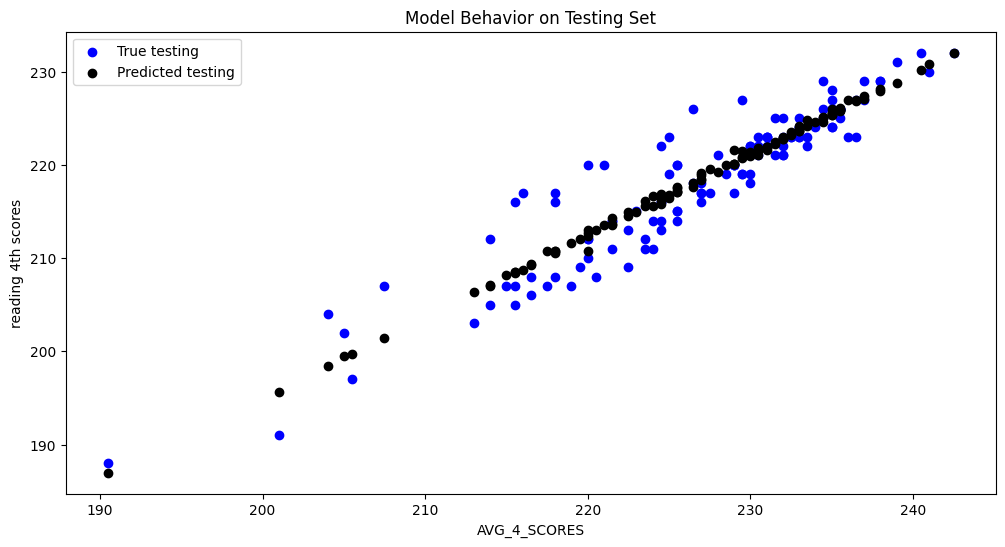

In [72]:
col_name = 'AVG_4_SCORES'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('reading 4th scores')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**It seems that the training works well with the linear - shaped plots, and generalizes well.
**